## os package

#### Absolute vs relatieve paden

In [35]:
import os

myfolder = 'myfolder'
myfile = 'myfile.txt'

# Current working directory as absolute path
current_dir = os.getcwd()

# Relative path to a file in the current directory
rel_path = os.path.join(myfolder, myfile)

# Construct the absolute path by combining the
# current directory and the relative path
abs_path = os.path.join(current_dir, rel_path)
print("Current Directory:", current_dir)
print("Relative Path:", rel_path)
print("Absolute Path:", abs_path)

Current Directory: D:\projecten\syntra\data science\github 23-24\practicalbusinesspython\slides\Chapter06
Relative Path: myfolder\myfile.txt
Absolute Path: D:\projecten\syntra\data science\github 23-24\practicalbusinesspython\slides\Chapter06\myfolder\myfile.txt


In [38]:
print(os.path.relpath(abs_path))
print(os.path.abspath(rel_path))

myfolder\myfile.txt
D:\projecten\syntra\data science\github 23-24\practicalbusinesspython\slides\Chapter06\myfolder\myfile.txt


#### Spelen met files/folders

In [36]:
import os
# Create a directory
os.mkdir("new_directory")
# Rename a file
os.rename("old_file.txt", "new_file.txt")
# Delete a file
os.remove("file_to_delete.txt")
# Delete a directory
os.rmdir(new_dir)

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'old_file.txt' -> 'new_file.txt'

#### Working directory

In [39]:
import os
# Get current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)
# Change working directory
os.chdir("/path/to/directory")

Current working directory: D:\projecten\syntra\data science\github 23-24\practicalbusinesspython\slides\Chapter06


FileNotFoundError: [WinError 3] The system cannot find the path specified: '/path/to/directory'

#### Spelen met paden

In [40]:
import os
# Join path components
path = os.path.join("dir1", "dir2", "file.txt")
print("Joined path:", path)
# Get basename of a path
basename = os.path.basename("/path/to/file.txt")
print("Basename:", basename)
# Get directory name of a path
dirname = os.path.dirname("/path/to/file.txt")
print("Directory name:", dirname)

Joined path: dir1\dir2\file.txt
Basename: file.txt
Directory name: /path/to


## Werken met tekst bestanden

In [42]:
with open("example_write.txt", "w") as file:
    file.write("Hello, World!")
    
with open("example_write.txt", "a") as file:
    file.write("\nHello, new line!")

In [45]:
file_name = "example_write.txt"
if not os.path.exists(file_name):
    with open(file_name, "w") as file:
        file.write("Hello, World!")
else:
    print(f"The file '{file_name}' already exists.")

The file 'example_write.txt' already exists.


In [48]:
with open("example_write.txt", "r") as file:
    content = file.read()
    print(content)

Hello, World!
Hello, new line!


## JSON files

In [50]:
import json

# Load the JSON settings file
settings = dict()

# Access and modify settings
settings["max_iterations"] = 1000
settings["learning_rate"] = 0.001

# Save the updated settings to the JSON file
with open("settings.json", 'w') as file:
    json.dump(settings, file, indent=4)
    
with open("settings.json") as file:
    settings_loaded = json.load(file)

print(settings_loaded)

{'max_iterations': 1000, 'learning_rate': 0.001}


## Working with tabular data: Excel & .csv files

In [3]:
import xlsxwriter
# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook('Expenses_xlsxwriter.xlsx')
worksheet = workbook.add_worksheet()

# Some data we want to write to the worksheet.
expenses = (
    ['Rent', 1000],
    ['Gas',   100],
    ['Food',  300],
    ['Gym',    50],
)

# Iterate over the data and write it out row by row.
for row, (item, cost) in enumerate(expenses):
    worksheet.write(row, 0, item)
    worksheet.write(row, 1, cost)

# Write a total using a formula.
worksheet.write(len(expenses), 0, 'Total')
worksheet.write(len(expenses), 1, '=SUM(B1:B4)')

workbook.close()

In [3]:
import pandas as pd

df = pd.DataFrame({
    'Amount': [1000, 100, 300, 50]
}, index=['Rent', 'Gas', 'Food', 'Gym'])
df.loc['Total', 'Amount'] = df['Amount'].sum()

df.to_excel('Expenses_pandas.xlsx', index=False)

In [5]:
pd.read_csv?

In [51]:
def save_to_excel(filename, dfs):
    """
    Given a dict of dataframes, for example:
    dfs = {'gadgets': df_gadgets, 'widgets': df_widgets}
    """

    writer = pd.ExcelWriter(filename, engine='xlsxwriter')
    for sheetname, df in dfs.items():  # loop through `dict` of dataframes
        df.to_excel(writer, sheet_name=sheetname)  # send df to writer
        worksheet = writer.sheets[sheetname]  # pull worksheet object
        for idx, col in enumerate(df):  # loop through all columns
            series = df[col]
            max_len = max((
                series.astype(str).map(len).max(),  # len of largest item
                len(str(series.name))  # len of column name/header
                )) + 1  # adding a little extra space
            worksheet.set_column(idx, idx, max_len)  # set column width
    writer.save()
    return

## Working with SQL databases

In [7]:
import sqlite3
import pandas as pd

# SQL query as a string
query = """SELECT LastName FROM customers
                LIMIT 5"""

# Connect to the database and execute the query
conn = sqlite3.connect("chinook.db")

# Use Pandas to read the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Display the DataFrame
display(df)

# Close the database connection
conn.close()

(1, 'Adams', 'Andrew', 'General Manager', None, '1962-02-18 00:00:00', '2002-08-14 00:00:00', '11120 Jasper Ave NW', 'Edmonton', 'AB', 'Canada', 'T5K 2N1', '+1 (780) 428-9482', '+1 (780) 428-3457', 'andrew@chinookcorp.com')
(2, 'Edwards', 'Nancy', 'Sales Manager', 1, '1958-12-08 00:00:00', '2002-05-01 00:00:00', '825 8 Ave SW', 'Calgary', 'AB', 'Canada', 'T2P 2T3', '+1 (403) 262-3443', '+1 (403) 262-3322', 'nancy@chinookcorp.com')
(3, 'Peacock', 'Jane', 'Sales Support Agent', 2, '1973-08-29 00:00:00', '2002-04-01 00:00:00', '1111 6 Ave SW', 'Calgary', 'AB', 'Canada', 'T2P 5M5', '+1 (403) 262-3443', '+1 (403) 262-6712', 'jane@chinookcorp.com')
(4, 'Park', 'Margaret', 'Sales Support Agent', 2, '1947-09-19 00:00:00', '2003-05-03 00:00:00', '683 10 Street SW', 'Calgary', 'AB', 'Canada', 'T2P 5G3', '+1 (403) 263-4423', '+1 (403) 263-4289', 'margaret@chinookcorp.com')
(5, 'Johnson', 'Steve', 'Sales Support Agent', 2, '1965-03-03 00:00:00', '2003-10-17 00:00:00', '7727B 41 Ave', 'Calgary', 'A

,LastName
0,Gonçalves
1,Köhler
2,Tremblay
3,Hansen
4,Wichterlová


In [9]:
import sqlite3
import pandas as pd

# SQL query as a string
query = """SELECT    employee.FirstName, 
                     employee.LastName, 
                     manager.FirstName, 
                     manager.LastName 
                    FROM employees employee
                    JOIN employees manager ON manager.EmployeeId = employee.ReportsTo"""

# Connect to the database and execute the query
conn = sqlite3.connect("chinook.db")

# Use Pandas to read the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Display the DataFrame
display(df)

# Close the database connection
conn.close()

,FirstName,LastName,FirstName,LastName
0,Nancy,Edwards,Andrew,Adams
1,Jane,Peacock,Nancy,Edwards
2,Margaret,Park,Nancy,Edwards
3,Steve,Johnson,Nancy,Edwards
4,Michael,Mitchell,Andrew,Adams
5,Robert,King,Michael,Mitchell
6,Laura,Callahan,Michael,Mitchell


## Pickle files

In [53]:
# Import the pickle module
import pickle

# Data to be saved in the pickle file
data = {"name": "John",
"age": 30,
"city": "New York"}

# Save data to a pickle file
with open("data.pickle", "wb") as file:
    pickle.dump(data, file)
# Load data from the pickle file

with open("data.pickle", "rb") as file:
    loaded_data = pickle.load(file)
    print(loaded_data)
# Output: {"name": "John",
# "age": 30,
# "city": "New York"}

{'name': 'John', 'age': 30, 'city': 'New York'}


## Images

In [16]:
import PIL
import numpy as np

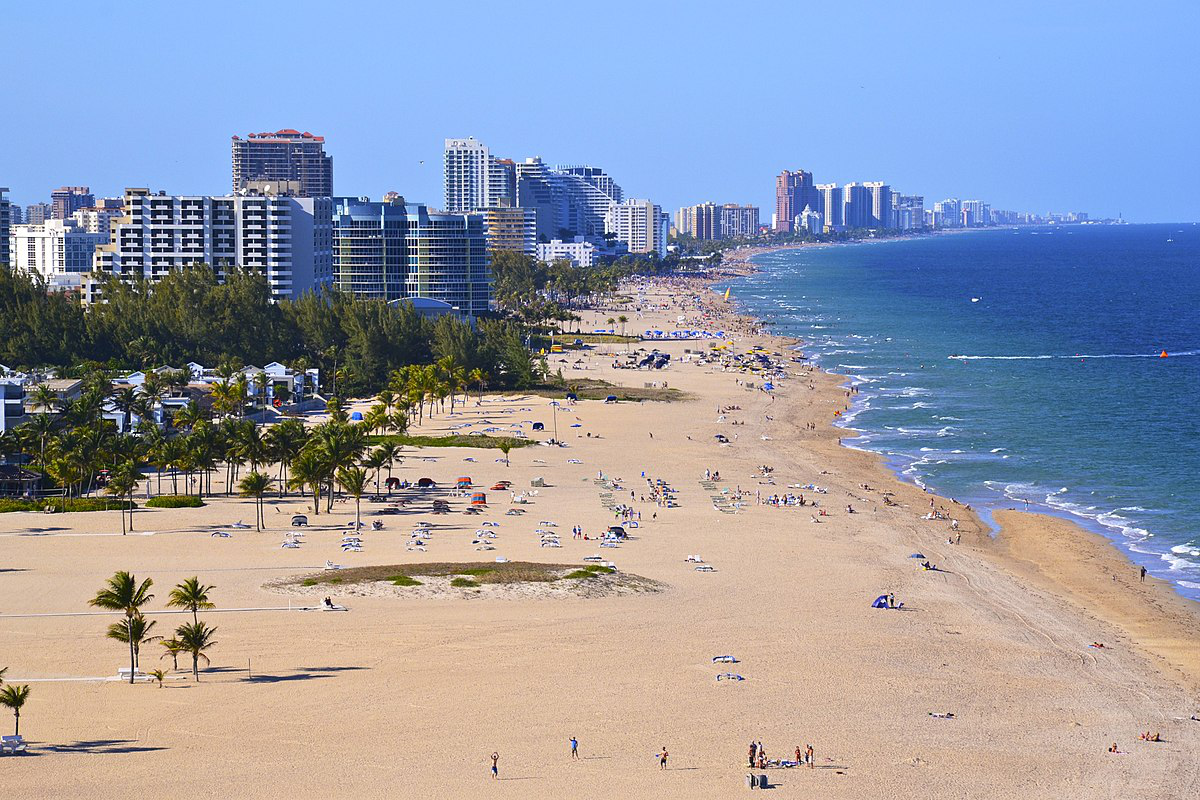

(800, 1200, 3)
---
[[[139 189 252]
  [139 189 252]
  [139 189 252]
  ...
  [133 181 253]
  [134 182 254]
  [134 182 254]]

 [[139 189 252]
  [139 189 252]
  [139 189 252]
  ...
  [133 181 253]
  [133 181 253]
  [133 181 253]]

 [[139 189 252]
  [139 189 252]
  [139 189 252]
  ...
  [133 181 253]
  [132 180 252]
  [132 180 252]]

 ...

 [[214 183 155]
  [212 181 153]
  [204 173 145]
  ...
  [210 183 172]
  [213 186 175]
  [191 164 153]]

 [[213 182 154]
  [193 162 134]
  [210 179 151]
  ...
  [221 194 183]
  [207 180 169]
  [202 175 164]]

 [[215 184 156]
  [189 158 130]
  [211 180 152]
  ...
  [221 194 183]
  [207 180 169]
  [190 163 152]]]


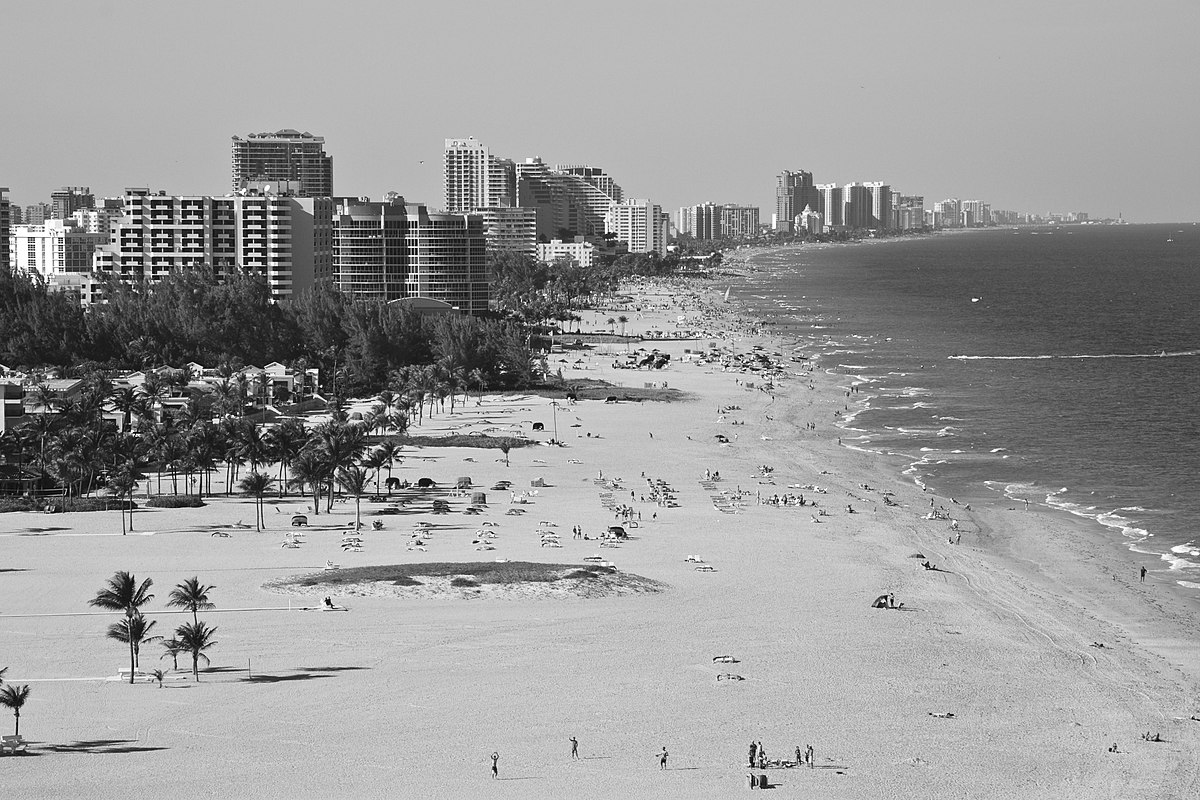

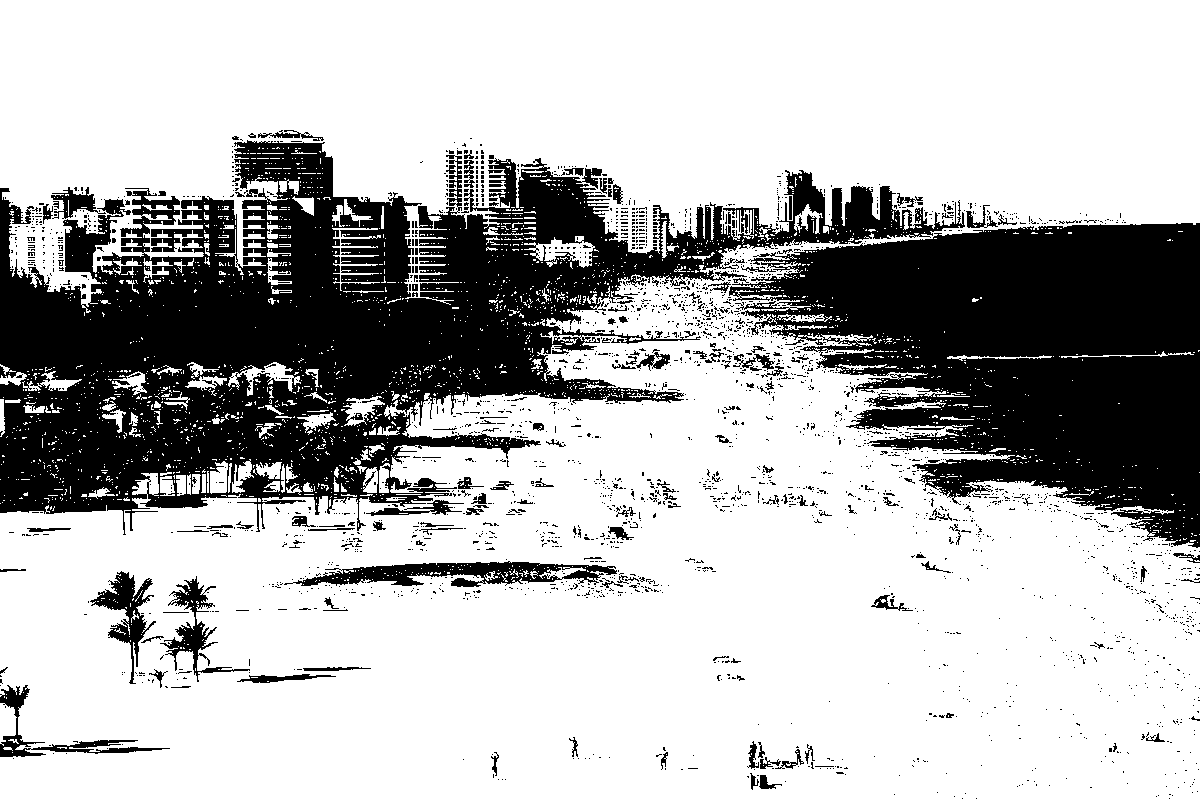

In [27]:
loc_img = 'Beach_at_Fort_Lauderdale.jpg'
with PIL.Image.open(loc_img) as img:
    
    display(img)
    arr_img = np.array(im)
    print(arr_img.shape)
    print('---')
    print(arr_img)
    
    grayscale_img = img.convert("L")
    display(grayscale_img)
    
    threshold = 128
    binary_image = grayscale_img.point(lambda x: 0 if x < threshold else 1, "1")
    display(binary_image)

## BeautifulSoup

In [10]:
import requests
from bs4 import BeautifulSoup

URL = "https://www.looopings.nl/wachten/phantasialand"

page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")



In [12]:
soup.find


<head>
<link href="css/style-2.css" rel="stylesheet" type="text/css"/>
<script src="js/jquery-latest.js" type="text/javascript"></script>
<script src="js/jquery.tablesorter.js" type="text/javascript"></script>
<meta content="180" http-equiv="refresh"/>
</head>
<body>
<script>

     window.onload = function () {
                startTab();
            };

            function startTab() {
                document.getElementById("defaultOpen").click();

            }

    function openTab(evt, dayName) {
        // Declare all variables
        var i, tabcontent, tablinks;

        tabcontent = document.getElementsByClassName("tabcontent");
        for (i = 0; i < tabcontent.length; i++) {
            tabcontent[i].style.display = "none";
        }

        tablinks = document.getElementsByClassName("tablinks");
        for (i = 0; i < tablinks.length; i++) {
            tablinks[i].className = tablinks[i].className.replace(" active", "");
        }

        document.getElementById(dayN